# Experiment 2: Data Preprocessing

  1. Noisy Data Handling (Equal-Width and Equal-Frequency Binning + Smoothing)
  2. Normalization Techniques (Min-Max, Z-Score, Decimal Scaling)
  3. Five-Number Summary

# Generate random Numbers

In [4]:
import random
import numpy as np # Import numpy
data = random.sample(range(10, 100), 20)
data = sorted(data)
data = np.array(data)
print("Random data sample: ", data)

Random data sample:  [11 12 16 21 35 49 58 65 79 81 82 83 88 89 90 91 92 94 97 99]


# Numbers of bins user wants

In [3]:
bins = int(input('Enter the number of bins: '))

Enter the number of bins: 5


In [5]:
import numpy as np
from statistics import mean, median



# Equal Width Binning
min_val, max_val = data.min(), data.max()
width = (max_val - min_val) / bins
ew_bins = [[] for _ in range(bins)]
for x in data:
    idx = min(int((x - min_val) / width), bins - 1)
    ew_bins[idx].append(int(x))

# Equal Frequency Binning
size = len(data) // bins
ef_bins = [list(data[i*size:(i+1)*size]) for i in range(bins)]

# Smoothing functions
def smooth_mean(bins):
    return [[round(mean(bin),2)]*len(bin) for bin in bins]

def smooth_median(bins):
    return [[round(median(bin),2)]*len(bin) for bin in bins]

def smooth_bound(bins):
    out = []
    for b in bins:
        mn, mx = min(b), max(b)
        smooth = [mn] + [mn if (x-mn)<=(mx-x) else mx for x in b[1:-1]] + [b[-1]]
        out.append(smooth)
    return out

# Display results
print("Random data sample:", data.tolist())
print("\nEqual Width Bins:", ew_bins)
print("Smooth Mean (EW):", smooth_mean(ew_bins))
print("Smooth Median (EW):", smooth_median(ew_bins))
print("Smooth Bounds (EW):", smooth_bound(ew_bins))
print("\nEqual Frequency Bins:", ef_bins)
print("Smooth Mean (EF):", smooth_mean(ef_bins))
print("Smooth Median (EF):", smooth_median(ef_bins))
print("Smooth Bounds (EF):", smooth_bound(ef_bins))

Random data sample: [11, 12, 16, 21, 35, 49, 58, 65, 79, 81, 82, 83, 88, 89, 90, 91, 92, 94, 97, 99]

Equal Width Bins: [[11, 12, 16, 21], [35], [49, 58], [65, 79, 81], [82, 83, 88, 89, 90, 91, 92, 94, 97, 99]]
Smooth Mean (EW): [[15, 15, 15, 15], [35], [53.5, 53.5], [75, 75, 75], [90.5, 90.5, 90.5, 90.5, 90.5, 90.5, 90.5, 90.5, 90.5, 90.5]]
Smooth Median (EW): [[14.0, 14.0, 14.0, 14.0], [35], [53.5, 53.5], [79, 79, 79], [90.5, 90.5, 90.5, 90.5, 90.5, 90.5, 90.5, 90.5, 90.5, 90.5]]
Smooth Bounds (EW): [[11, 11, 11, 21], [35, 35], [49, 58], [65, 81, 81], [82, 82, 82, 82, 82, 99, 99, 99, 99, 99]]

Equal Frequency Bins: [[np.int64(11), np.int64(12), np.int64(16), np.int64(21)], [np.int64(35), np.int64(49), np.int64(58), np.int64(65)], [np.int64(79), np.int64(81), np.int64(82), np.int64(83)], [np.int64(88), np.int64(89), np.int64(90), np.int64(91)], [np.int64(92), np.int64(94), np.int64(97), np.int64(99)]]
Smooth Mean (EF): [[np.int64(15), np.int64(15), np.int64(15), np.int64(15)], [np.int

In [6]:
# 2.2 Normalization Techniques
norm_data = np.array(data)
min_d, max_d = min(norm_data), max(norm_data)

# Min-max normalization
minmax_norm = [round((x-min_d)/(max_d-min_d), 2) for x in norm_data]

# Z-score normalization
from statistics import mean, stdev
import numpy as np
mean_d, std_d = np.mean(norm_data), np.std(norm_data)
z_norm = [round((x-mean_d)/std_d, 2) for x in norm_data]

# Decimal scaling
j = len(str(abs(max(norm_data))))
dec_norm = [round(x/(10**j), 2) for x in norm_data]

# Display results
print("Sample data:", norm_data)
print("\nMin-max norm:", minmax_norm)
print("Z-score norm:", z_norm)
print("Decimal scaling norm:", dec_norm)

Sample data: [11 12 16 21 35 49 58 65 79 81 82 83 88 89 90 91 92 94 97 99]

Min-max norm: [np.float64(0.0), np.float64(0.01), np.float64(0.06), np.float64(0.11), np.float64(0.27), np.float64(0.43), np.float64(0.53), np.float64(0.61), np.float64(0.77), np.float64(0.8), np.float64(0.81), np.float64(0.82), np.float64(0.88), np.float64(0.89), np.float64(0.9), np.float64(0.91), np.float64(0.92), np.float64(0.94), np.float64(0.98), np.float64(1.0)]
Z-score norm: [np.float64(-1.83), np.float64(-1.8), np.float64(-1.67), np.float64(-1.5), np.float64(-1.04), np.float64(-0.58), np.float64(-0.28), np.float64(-0.05), np.float64(0.41), np.float64(0.47), np.float64(0.51), np.float64(0.54), np.float64(0.7), np.float64(0.74), np.float64(0.77), np.float64(0.8), np.float64(0.84), np.float64(0.9), np.float64(1.0), np.float64(1.07)]
Decimal scaling norm: [np.float64(0.11), np.float64(0.12), np.float64(0.16), np.float64(0.21), np.float64(0.35), np.float64(0.49), np.float64(0.58), np.float64(0.65), np.float6

Random data sample:  [11 12 16 21 35 49 58 65 79 81 82 83 88 89 90 91 92 94 97 99]
Minimum: 11
Q1 (25%): 45.5
Median (50%): 81.5
Q3 (75%): 90.25
Maximum: 99


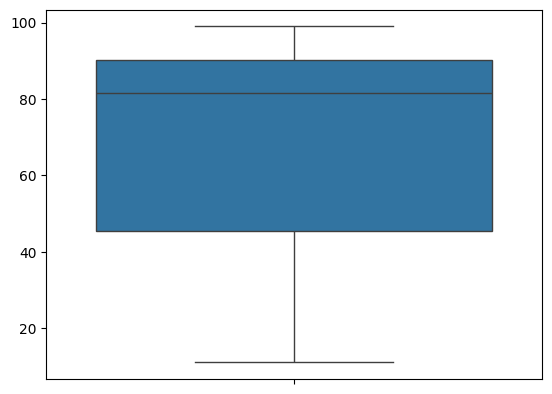

In [7]:
# 2.3 Five-Number Summary
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Random data sample: ", data)
q1, q2, q3 = np.percentile(data, [25, 50, 75])
print("Minimum:", data.min())
print("Q1 (25%):", q1)
print("Median (50%):", q2)
print("Q3 (75%):", q3)
print("Maximum:", data.max())
sns.boxplot(data)
plt.show()